In [1]:
#dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#import OpenWeather API key
from api_keys import weather_api_key

#import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
#empty list for holding latitude and latitude coordinates
lat_lngs = []

#empty list for holding cities
cities = []

#range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#create random latitude and longitude combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #if the city is unique, then add it to cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


## Plots to Showcase the Relationship Between Weather Variables and Latitude

In [3]:
#set the API base URL
url ="https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#define an empty list to fetch the weather data for each city
city_data = []

#print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

#loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    #create endpoint URL with each city
    city_url = query_url + city
    
    #log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    #add 1 to the record count
    record_count += 1

    #run an API request for each of the cities
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
    

        #parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        #append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
#indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | ouesso
Processing Record 5 of Set 1 | moranbah
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | portland
Processing Record 10 of Set 1 | suba
Processing Record 11 of Set 1 | viedma
Processing Record 12 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 13 of Set 1 | tihemetsa
Processing Record 14 of Set 1 | nabire
Processing Record 15 of Set 1 | morlaix
Processing Record 16 of Set 1 | scalloway
City not found. Skipping...
Processing Record 17 of Set 1 | jamestown
Processing Record 18 of Set 1 | katsuura
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | east london
Processing Record 22 of

City not found. Skipping...
Processing Record 35 of Set 4 | fairbanks
Processing Record 36 of Set 4 | klaksvik
Processing Record 37 of Set 4 | boa vista
Processing Record 38 of Set 4 | mount gambier
Processing Record 39 of Set 4 | bria
Processing Record 40 of Set 4 | fortuna
Processing Record 41 of Set 4 | hihifo
City not found. Skipping...
Processing Record 42 of Set 4 | husavik
Processing Record 43 of Set 4 | victoria
Processing Record 44 of Set 4 | babanusah
City not found. Skipping...
Processing Record 45 of Set 4 | andujar
Processing Record 46 of Set 4 | vaini
Processing Record 47 of Set 4 | griffith
Processing Record 48 of Set 4 | touros
Processing Record 49 of Set 4 | poum
Processing Record 0 of Set 5 | chagda
City not found. Skipping...
Processing Record 1 of Set 5 | hithadhoo
Processing Record 2 of Set 5 | hirara
Processing Record 3 of Set 5 | el alto
Processing Record 4 of Set 5 | ngukurr
City not found. Skipping...
Processing Record 5 of Set 5 | arraial do cabo
Processing Re

Processing Record 18 of Set 8 | catanduva
Processing Record 19 of Set 8 | sinnamary
Processing Record 20 of Set 8 | merauke
Processing Record 21 of Set 8 | bay roberts
Processing Record 22 of Set 8 | thunder bay
Processing Record 23 of Set 8 | kayerkan
Processing Record 24 of Set 8 | great yarmouth
Processing Record 25 of Set 8 | maridi
Processing Record 26 of Set 8 | vysokogornyy
Processing Record 27 of Set 8 | kapoeta
Processing Record 28 of Set 8 | east northport
Processing Record 29 of Set 8 | manaure
Processing Record 30 of Set 8 | chunhuhub
Processing Record 31 of Set 8 | isabela
Processing Record 32 of Set 8 | poya
Processing Record 33 of Set 8 | nesbyen
Processing Record 34 of Set 8 | tabou
Processing Record 35 of Set 8 | kuopio
Processing Record 36 of Set 8 | zabid
Processing Record 37 of Set 8 | thinadhoo
Processing Record 38 of Set 8 | ixtapa
Processing Record 39 of Set 8 | port hawkesbury
Processing Record 40 of Set 8 | mao
Processing Record 41 of Set 8 | narsaq
Processing 

Processing Record 10 of Set 12 | meadow lake
Processing Record 11 of Set 12 | taungdwingyi
Processing Record 12 of Set 12 | anadyr
Processing Record 13 of Set 12 | nelson bay
Processing Record 14 of Set 12 | nacozari
Processing Record 15 of Set 12 | kamloops
Processing Record 16 of Set 12 | taoudenni
Processing Record 17 of Set 12 | sindi
Processing Record 18 of Set 12 | rio bananal
Processing Record 19 of Set 12 | kilindoni
Processing Record 20 of Set 12 | katha
City not found. Skipping...
Processing Record 21 of Set 12 | kapuskasing
Processing Record 22 of Set 12 | henties bay
Processing Record 23 of Set 12 | kafanchan
Processing Record 24 of Set 12 | bandarbeyla
Processing Record 25 of Set 12 | pilar
Processing Record 26 of Set 12 | floro
Processing Record 27 of Set 12 | lichinga
Processing Record 28 of Set 12 | adrar
Processing Record 29 of Set 12 | corinto
Processing Record 30 of Set 12 | sambava
Processing Record 31 of Set 12 | mokhsogollokh
Processing Record 32 of Set 12 | bella

In [4]:
#convert cities weather data into Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#show record count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [5]:
#display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,78.51,74,80,10.98,PF,1675016270
1,cape town,-33.9258,18.4232,75.34,50,0,18.41,ZA,1675016100
2,ribeira grande,38.5167,-28.7000,59.40,72,40,5.75,PT,1675016271
3,ouesso,1.6136,16.0517,78.93,61,91,0.07,CG,1675016011
4,moranbah,-22.0016,148.0466,71.55,89,90,6.46,AU,1675016272


In [6]:
#export city data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [87]:
#read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

#display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,78.51,74,80,10.98,PF,1675016270
1,cape town,-33.9258,18.4232,75.34,50,0,18.41,ZA,1675016100
2,ribeira grande,38.5167,-28.7000,59.40,72,40,5.75,PT,1675016271
3,ouesso,1.6136,16.0517,78.93,61,91,0.07,CG,1675016011
4,moranbah,-22.0016,148.0466,71.55,89,90,6.46,AU,1675016272


## Latitude vs. Temperature Plots

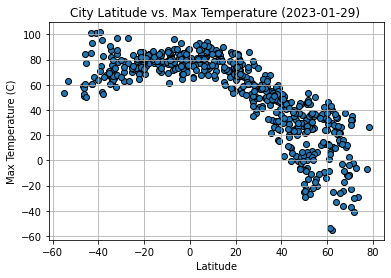

In [106]:
#build scatter plot
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature (%s) " % time.strftime("%Y-%m-%d"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

#incorporate other graph properties
plt.grid()
plt.savefig("output_data/Fig1.png")
plt.show()



## Latitude vs. Humidity

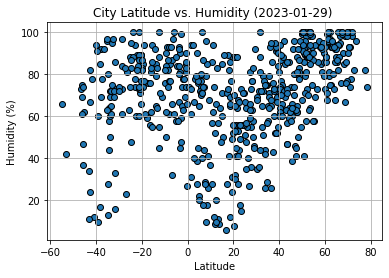

In [110]:
#build scatter plot
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Humidity (%s) " % time.strftime("%Y-%m-%d"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

#incorporate other graph properties
plt.grid()
plt.savefig("output_data/Fig2.png")
plt.show()

## Latitude vs. Cloudiness

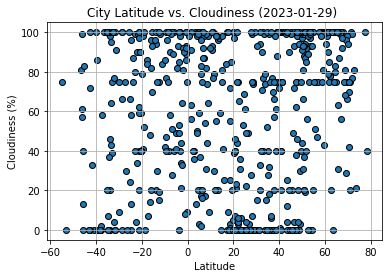

In [112]:
#build scatter plot
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness (%s) " % time.strftime("%Y-%m-%d"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

#incorporate other graph properties
plt.grid()
plt.savefig("output_data/Fig3.png")
plt.show()

## Latitude vs. Wind Speed

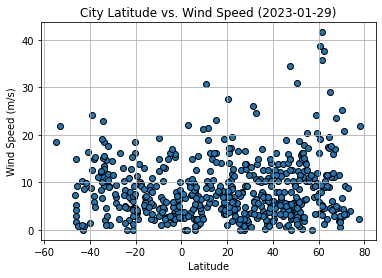

In [111]:
#build scatter plot
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, linewidth=1, marker="o", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")

plt.xlabel("Latitude")
#incorporate other graph properties
plt.grid()
plt.savefig("output_data/Fig4.png")
plt.show()

## Linear Regression for Each Relationship

In [166]:
#define a function to create Linear Regression plots
def regression_plots(x_values,y_values,title, y_label, line_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,line_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [137]:
#create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ribeira grande,38.5167,-28.7000,59.40,72,40,5.75,PT,1675016271
3,ouesso,1.6136,16.0517,78.93,61,91,0.07,CG,1675016011
6,qaanaaq,77.4840,-69.3632,-6.66,82,100,2.21,GL,1675016125
7,yellowknife,62.4560,-114.3525,-25.08,75,20,4.61,CA,1675016163
8,portland,45.5234,-122.6762,36.84,39,20,18.99,US,1675015958


In [138]:
#create a DataFrame with the Southern Hemisphere data (Latitude > 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,78.51,74,80,10.98,PF,1675016270
1,cape town,-33.9258,18.4232,75.34,50,0,18.41,ZA,1675016100
4,moranbah,-22.0016,148.0466,71.55,89,90,6.46,AU,1675016272
5,punta arenas,-53.1500,-70.9167,62.71,42,0,21.85,CL,1675016272
10,viedma,-40.8135,-62.9967,101.39,12,0,16.44,AR,1675016279


## Temperature vs. Latitude Linear Regression Plot (Northern & Southern Hemisphere)

The r-value is: 0.7001882123518071


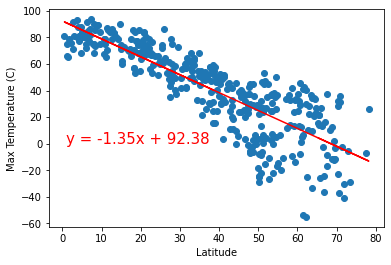

In [164]:
#linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
regression_plots(x_values,y_values,"Northern Hemisphere: Temperature vs. Latitude Linear Regression", 
                 "Max Temperature (C)", (1,0))

The r-value is: 0.127469601678382


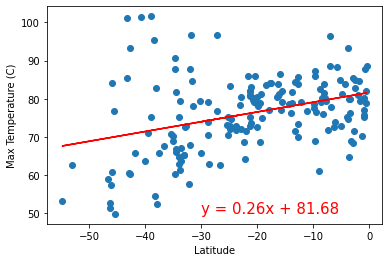

In [165]:
#linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
regression_plots(x_values,y_values,"Southern Hemisphere: Temperature vs. Latitude Linear Regression", 
                 "Max Temperature (C)", (-30, 50))